In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series,DataFrame

titanic_df = pd.read_csv('train.csv')
%matplotlib inline


In [76]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
#titanic_df.describe()

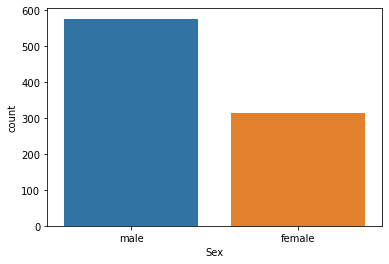

In [84]:
sns.countplot('Sex',data=titanic_df)

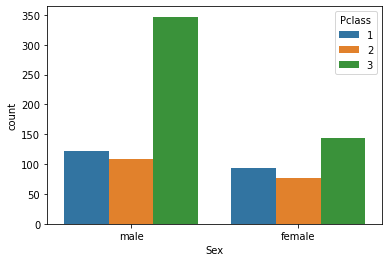

In [86]:
sns.countplot('Sex',data=titanic_df,hue='Pclass')

In [88]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16 :
        return 'child'
    else:
        return sex

In [89]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [91]:
#titanic_df[0:10]

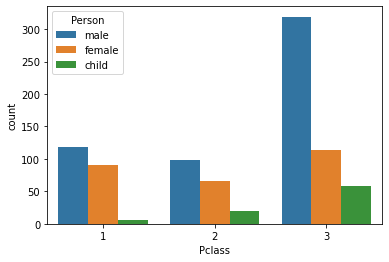

In [93]:
sns.countplot('Pclass',data=titanic_df,hue='Person')

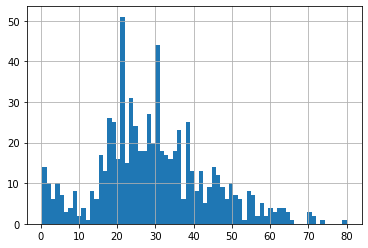

In [95]:
titanic_df['Age'].hist(bins=70)

In [97]:
titanic_df['Age'].mean()

29.69911764705882

In [99]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

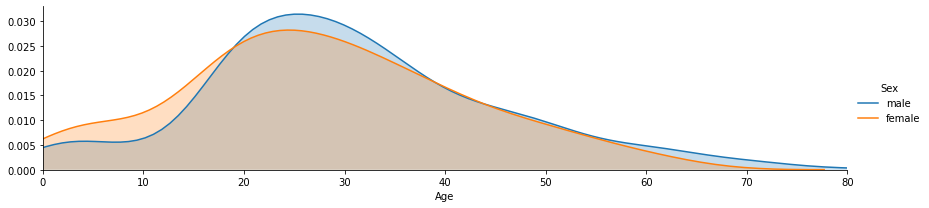

In [101]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

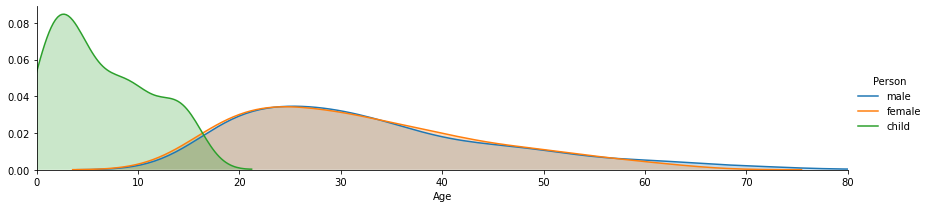

In [103]:
fig = sns.FacetGrid(titanic_df,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

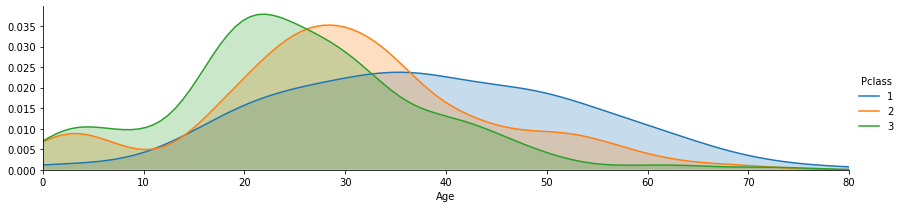

In [105]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))


fig.add_legend()

In [107]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [109]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [111]:
deck = titanic_df['Cabin'].dropna()

In [112]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

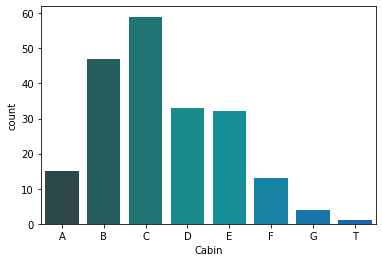

In [114]:
lvl = []

for lvls in deck:
    lvl.append(lvls[0])

    cabin_df = DataFrame(lvl)
    cabin_df.columns = ['Cabin']
    sns.countplot('Cabin',data=cabin_df,palette='winter_d',order=['A','B','C','D','E','F','G','T'])
    

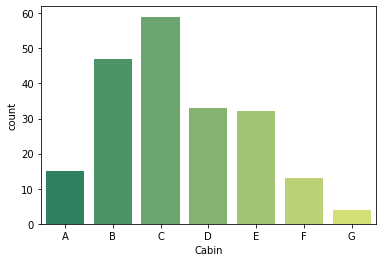

In [116]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin',data=cabin_df,palette='summer',order=['A','B','C','D','E','F','G'])

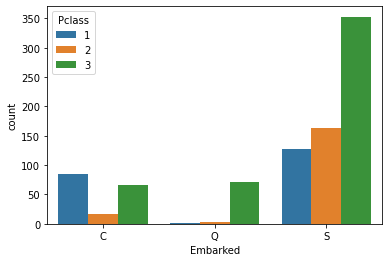

In [118]:
sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

In [120]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

In [122]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [124]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

TypeError: '>' not supported between instances of 'str' and 'int'

In [125]:
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'ALone'

In [126]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,ALone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,ALone


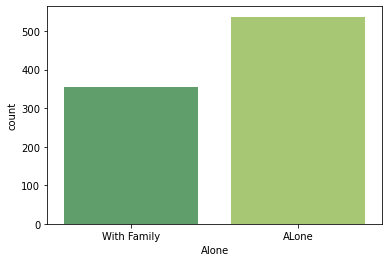

In [127]:
sns.countplot('Alone',data=titanic_df,palette='summer')

In [128]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

In [129]:
#titanic_df.head()

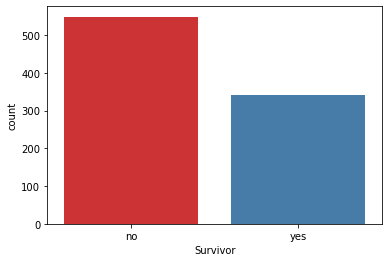

In [130]:
sns.countplot('Survivor',data=titanic_df,palette="Set1")

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


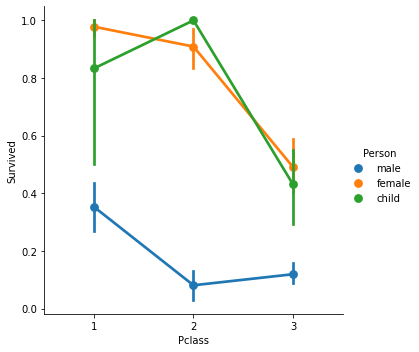

In [138]:
sns.factorplot('Pclass','Survived',hue='Person',data=titanic_df)